<a href="https://colab.research.google.com/github/damiangohrh123/ml_projects/blob/main/classification/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Decision Trees on Titanic
"""
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load & preprocess
titanic = sns.load_dataset("titanic")

# Fill missing ages
titanic["age"] = titanic["age"].fillna(titanic["age"].mean())
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Encode categorical variables. Converts categorical columns into indicator variables: 0 or 1, or true or false
# Example: sex (female=0, male=1)
titanic = pd.get_dummies(titanic, columns=["sex", "embarked"], drop_first=True)
titanic.head(5)

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,True,False,True
1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,False,False,False
2,1,3,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,False,False,True
3,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,False,False,True
4,0,3,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,True,False,True


Accuracy: 0.7988826815642458


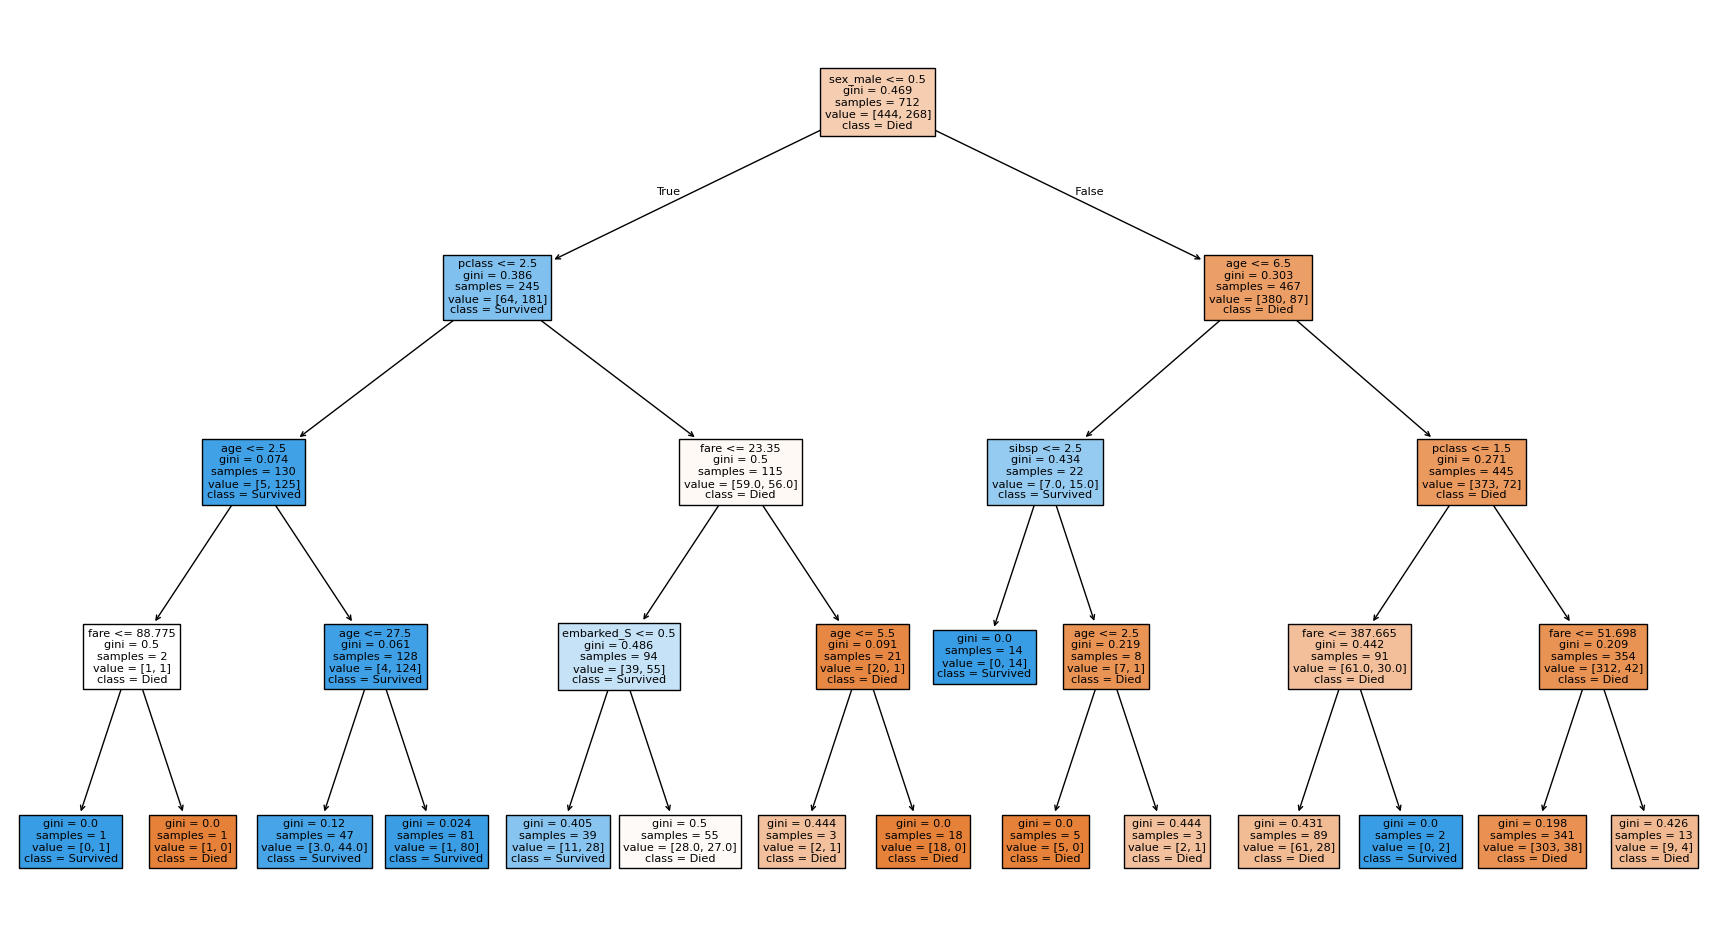

In [ ]:
# Features & labels
feature_cols = ["pclass", "age", "sibsp", "parch", "fare", "sex_male"]
# Include any embarked dummy columns dynamically
feature_cols += [col for col in titanic.columns if col.startswith("embarked_")]

X = titanic[feature_cols]
y = titanic["survived"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Evaluate
print("Accuracy:", accuracy_score(y_test, tree.predict(X_test)))

# Plot tree
plt.figure(figsize=(22,12))
plot_tree(tree, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)
plt.show()